# Import all required libraries and load the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read file

AB_NYC_df = pd.read_csv(r'C:\Data Science\MLZoomcamp\Datasets\archive\AB_NYC_2019.csv')
AB_NYC_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# The goal is to create a regression model for prediction apartment prices (column 'price')

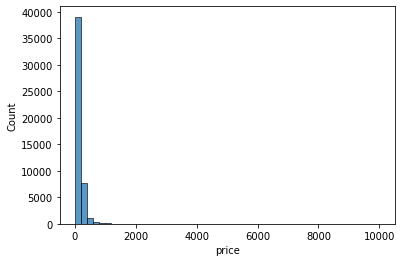

In [3]:
# look at the price variable and find out if it has a long tail

sns.histplot(AB_NYC_df.price, bins = 50)

# answer is yes!

In [4]:
# select the features which we need for rest of the homework:
AB_NYC_df. columns

features = ['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']
AB_NYC_df2 = AB_NYC_df[features]

AB_NYC_df2 .head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0


# Q.1 Find a feature with missing values. How many missing values does it have?

In [5]:
AB_NYC_df2.isnull()

# to see sum of the No. of values across the columns
AB_NYC_df2.isnull().sum()

#answer: reviewes per month is the feature with missing values. It has 10052 missing values

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# Q.2 What's the median (50% percentile) for variable 'minimum_nights'?

In [6]:
# using the np.median function:

np.median(AB_NYC_df2['minimum_nights'])

# answer is 3.0

3.0

# Split the data

In [7]:
# Shuffle the initial dataset, use seed 42.

n = len(AB_NYC_df2) #n = 48895

# to do that have an index arrangement
idx = np.arange(n)
idx

#shuffling
np.random.seed(42)
np.random.shuffle(idx)

# initial data is shuffled

AB_NYC_df2.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0


In [8]:
#Split your data in train/val/test sets, with 60%/20%/20% distribution.

n_train = int(n*0.6)
n_val = int(n*0.2)
n_test = int(n*0.2)

#check the division
n, n_val+n_test+n_train


(48895, 48895)

In [9]:
AB_NYC_df2_train = AB_NYC_df2.iloc[idx[:n_train]]
AB_NYC_df2_val = AB_NYC_df2.iloc[idx[n_train:n_train+n_val]]
AB_NYC_df2_test = AB_NYC_df2.iloc[idx[n_train+n_val:]]

# now this will be same everytime
AB_NYC_df2_train.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
879,40.64354,-73.97777,89,3,62,0.71,1,189
44383,40.70666,-73.90779,30,21,0,NaN,1,73
15394,40.76116,-73.99016,120,2,17,0.43,1,0
43230,40.70763,-74.01050,470,2,5,1.88,327,272
16332,40.79658,-73.93287,199,2,30,0.80,1,30


In [10]:
#Apply the log transformation to the price variable using the np.log1p() function.
#get numpy array, becasue we onyl need price values

y_train = np.log1p(AB_NYC_df2_train.price.values)
y_val = np.log1p(AB_NYC_df2_val.price.values)
y_test = np.log1p(AB_NYC_df2_test.price.values)

In [11]:
#Make sure that the target value ('price') is not in your dataframe.
del AB_NYC_df2_train['price']
del AB_NYC_df2_val['price']
del AB_NYC_df2_test['price']

# Q3

In [27]:
#We need to deal with missing values for the column from Q1.
#We have two options: fill it with 0 or with the mean of this variable.
#Try both options. For each, train a linear regression model without regularization using the code from the lessons.

def prepare_X_z(AB_NYC_df2):
    
    AB_NYC_df2 = AB_NYC_df2.copy()
    
    AB_NYC_df2['reviews_per_month'] = AB_NYC_df2['reviews_per_month'].fillna(0)
    
    X = AB_NYC_df2.values # extracting the feature matrix
    
    return X


In [29]:
# train and validation datasets for missing values filled with 0
X_train_z = prepare_X_z(AB_NYC_df2_train)
X_val_z = prepare_X_z(AB_NYC_df2_val)


In [30]:
# now with the mean value
def prepare_X_mean(AB_NYC_df2):
    
    AB_NYC_df2 = AB_NYC_df2.copy()
    
    mean_value = AB_NYC_df2['reviews_per_month'].mean()
    AB_NYC_df2['reviews_per_month'] = AB_NYC_df2['reviews_per_month'].fillna(mean_value)
    
    X = AB_NYC_df2.values # extracting the feature matrix
    
    return X


In [31]:
# train and validation datasets for missing values filled with mean
############# training part ##################
X_train_mean = prepare_X_mean(AB_NYC_df2_train)
X_val_mean = prepare_X_mean(AB_NYC_df2_val)

In [32]:
X_train_z

array([[ 4.064354e+01, -7.397777e+01,  3.000000e+00, ...,  7.100000e-01,
         1.000000e+00,  1.890000e+02],
       [ 4.070666e+01, -7.390779e+01,  2.100000e+01, ...,  0.000000e+00,
         1.000000e+00,  7.300000e+01],
       [ 4.076116e+01, -7.399016e+01,  2.000000e+00, ...,  4.300000e-01,
         1.000000e+00,  0.000000e+00],
       ...,
       [ 4.072716e+01, -7.398524e+01,  3.000000e+00, ...,  3.120000e+00,
         1.000000e+00,  6.000000e+01],
       [ 4.079578e+01, -7.394523e+01,  2.000000e+00, ...,  2.100000e+00,
         1.000000e+00,  2.650000e+02],
       [ 4.069671e+01, -7.394896e+01,  1.000000e+00, ...,  5.000000e-02,
         1.000000e+00,  0.000000e+00]])

In [33]:
len(y_train)

29337

In [34]:
X_train_mean

array([[ 4.06435400e+01, -7.39777700e+01,  3.00000000e+00, ...,
         7.10000000e-01,  1.00000000e+00,  1.89000000e+02],
       [ 4.07066600e+01, -7.39077900e+01,  2.10000000e+01, ...,
         1.36854921e+00,  1.00000000e+00,  7.30000000e+01],
       [ 4.07611600e+01, -7.39901600e+01,  2.00000000e+00, ...,
         4.30000000e-01,  1.00000000e+00,  0.00000000e+00],
       ...,
       [ 4.07271600e+01, -7.39852400e+01,  3.00000000e+00, ...,
         3.12000000e+00,  1.00000000e+00,  6.00000000e+01],
       [ 4.07957800e+01, -7.39452300e+01,  2.00000000e+00, ...,
         2.10000000e+00,  1.00000000e+00,  2.65000000e+02],
       [ 4.06967100e+01, -7.39489600e+01,  1.00000000e+00, ...,
         5.00000000e-02,  1.00000000e+00,  0.00000000e+00]])

In [35]:
len(X_train_mean)


29337

In [36]:
# Use the validation dataset to evaluate the models and compare the RMSE of each option.

def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y) 
   
    return w_full[0], w_full[1:] # because first is the biased term and rest is the weights

In [38]:
############# validation part ##################

# prepare matrix to train the model
# biased terms
w0_z, w_z = train_linear_regression(X_train_z, y_train)

w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)



In [39]:

# now we will apply it to the validation datasets
X_val_z = prepare_X_z(AB_NYC_df2_val)
X_val_mean = prepare_X_mean(AB_NYC_df2_val)


In [40]:
# now prediction from the validation dataset
y_pred_z = w0_z + X_val_z.dot(w_z)
y_pred_mean = w0_mean + X_val_mean.dot(w_mean)


In [41]:
# RMSEA
def rmsea(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [42]:
#Use the validation datasets to evaluate the models and compare the RMSE of each option.

print(rmsea(y_val, y_pred_z))
print(rmsea(y_val, y_pred_mean))

0.6430337788626718
0.6427535847595189


In [44]:
# test 1 with zero values
train_linear_regression(X_train_z,y_train)

(-419.9126581640378,
 array([ 1.30676225e+00, -5.02167854e+00, -5.59803109e-04, -4.07634896e-04,
        -8.25470069e-03,  1.33371320e-03,  6.50203890e-04]))

In [ ]:
# test 2 with mean values
train_linear_regression(X_train_mean,y_train)

# Round the RMSE scores to 2 decimal digits using round(score, 2). Which option gives better RMSE?

In [48]:
print(round(rmsea(y_val, y_pred_z), 2))
print(round(rmsea(y_val, y_pred_mean), 2))

0.64
0.64


# Q4

In [51]:
#Now let's train a regularized linear regression.
# For this question, fill the NAs with 0.

# regularized model
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]


In [55]:
prepare_X = prepare_X_z
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    
    X_train = prepare_X(AB_NYC_df2_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(AB_NYC_df2_val)
    y_pred = w0 + X_val.dot(w)
    
    # rmsea
    #print(round(rmsea(y_val, y_pred),2)) 

    score = round(rmsea(y_val, y_pred),2)
    print(r, w0, score)


0.0 -419.9126581640378 0.64
1e-05 -419.4137633339144 0.64
0.0001 -414.9764921696666 0.64
0.001 -375.27365237202883 0.64
0.1 -32.562560546084626 0.68
1 -3.499216835988334 0.68
10 -0.35127676027235744 0.68


# Q5

In [ ]:
#We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
#Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
#For each seed, do the train/validation/test split with 60%/20%/20% distribution.
#Fill the missing values with 0 and train a model without regularization.
#For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
#What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
#Round the result to 3 decimal digits (round(std, 3))

In [57]:
errors = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    idx = np.arange(n)

    np.random.seed(seed)
    np.random.shuffle(idx)

    AB_NYC_df2_train      = AB_NYC_df2.iloc[idx[:n_train]]
    AB_NYC_df2_val        = AB_NYC_df2.iloc[idx[n_train:n_train+n_val]]

    y_train = np.log1p(AB_NYC_df2_train.price)
    y_val   = np.log1p(AB_NYC_df2_val.price)

    del AB_NYC_df2_train['price']
    del AB_NYC_df2_val['price']
    
    X_train = prepare_X(AB_NYC_df2_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=0)

    X_val = prepare_X(AB_NYC_df2_val)
    y_pred = w0 + X_val.dot(w)
    score = rmsea(y_val, y_pred)
    errors.append(score)
np.std(errors)

print(round(np.std(errors), 3))

0.008


# Q6

In [58]:

#Split the dataset like previously, use seed 9.
#Combine train and validation datasets.
#Fill the missing values with 0 and train a model with r=0.001.
#What's the RMSE on the test dataset?

In [61]:
n = len(AB_NYC_df2)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)

np.random.seed(9)
np.random.shuffle(idx)

AB_NYC_df2_train      = AB_NYC_df2.iloc[idx[:n_train]]
AB_NYC_df2_val        = AB_NYC_df2.iloc[idx[n_train:n_train+n_val]]
AB_NYC_df2_test       = AB_NYC_df2.iloc[idx[n_train+n_val:]]

df_combo = AB_NYC_df2.iloc[idx[:n_train+n_val]]

y_train = np.log1p(AB_NYC_df2_train.price)
y_val   = np.log1p(AB_NYC_df2_val.price)
y_test  = np.log1p(AB_NYC_df2_test.price)

del AB_NYC_df2_train['price']
del AB_NYC_df2_val['price']
del AB_NYC_df2_test['price']
    
prepare_X = prepare_X_z
    
X_train = prepare_X(AB_NYC_df2_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(AB_NYC_df2_val)
y_pred = w0 + X_val.dot(w)
score = rmsea(y_val, y_pred)
    
score = round(score, 2)
    
    
print(r, w0, score)

10 -193.9632321192521 0.65
